<a href="https://colab.research.google.com/github/nandersonrodrigues/analise-dados-covid19-AL/blob/main/projeto_python_pandas_covid19_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploração de dados da covid 19 no estado de Alagoas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('drive/MyDrive/dados/dadosabertos.csv', encoding='utf-8', sep=';')
df.head(10)

,SEXO,MUNICÍPIO DE RESIDÊNCIA,BAIRRO,CEP,"CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)",Comorbidades,"Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?"
0,F,MACEIÓ,PONTA GROSSA,57244000,CONFIRMADO,SEM COMORBIDADE,RECUPERADO
1,M,MACEIÓ,BOM PARTO,57051191,CONFIRMADO,DOENÇA PULMONAR CRÔNICA,RECUPERADO
2,M,MACEIÓ,TABULEIRO DO MARTINS,57017224,CONFIRMADO,NaN,RECUPERADO
3,M,MACEIÓ,SANTA LÚCIA,57036590,CONFIRMADO,NaN,RECUPERADO
4,M,MACEIÓ,LEVADA,57085799,CONFIRMADO,NaN,RECUPERADO
5,M,MACEIÓ,JATIÚCA,57071084,CONFIRMADO,NaN,RECUPERADO
6,M,MACEIÓ,JARDIM PETRÓPOLIS,57035690,CONFIRMADO,NaN,RECUPERADO
7,F,MACEIÓ,JATIÚCA,57080547,CONFIRMADO,NaN,RECUPERADO
8,F,MACEIÓ,PONTA VERDE,57036750,CONFIRMADO,HAS,RECUPERADO
9,M,MACEIÓ,JATIÚCA,NaN,CONFIRMADO,ASMA,RECUPERADO


###Limpeza e ajustes

In [546]:
#ajuste dos nomes das colunas
df = df.rename(columns={
    "SEXO":"sexo",
    "MUNICÍPIO DE RESIDÊNCIA":"municipio_residencia",
    "BAIRRO":"bairro",
    "CEP":"cep",
    "CLASSIFICAÇÃO (Confirmado, suspeito, descartado, óbito, curado)":"classificacao",
    "Comorbidades":"comorbidades",
    "Situação do paciente confirmado (UTI, isolamento domiciliar, enfermaria) ?":"situacao_paciente"
})

In [547]:
df.head()

,sexo,municipio_residencia,bairro,cep,classificacao,comorbidades,situacao_paciente
0,F,MACEIÓ,PONTA GROSSA,57244000,CONFIRMADO,SEM COMORBIDADE,RECUPERADO
1,M,MACEIÓ,BOM PARTO,57051191,CONFIRMADO,DOENÇA PULMONAR CRÔNICA,RECUPERADO
2,M,MACEIÓ,TABULEIRO DO MARTINS,57017224,CONFIRMADO,NaN,RECUPERADO
3,M,MACEIÓ,SANTA LÚCIA,57036590,CONFIRMADO,NaN,RECUPERADO
4,M,MACEIÓ,LEVADA,57085799,CONFIRMADO,NaN,RECUPERADO


#### campo sexo

In [548]:
df['sexo'].unique()

array(['F', 'M', <NA>], dtype=object)

In [549]:
filtro = df.sexo.isin([' F', 'f', 'Feminino'])
df.loc[filtro] = 'F'

In [550]:
filtro = df.sexo.isin(['HOSPITALIZADO', 'NÃO CONFIRMADO'])
df.loc[filtro] = pd.NA

In [551]:
df['sexo'].unique()

array(['F', 'M', <NA>], dtype=object)

In [552]:
df.groupby(['sexo']).sexo.count()

sexo
F    126768
M    100812
Name: sexo, dtype: int64

In [553]:
filtro = df.sexo == 'HOSPITALIZADO'
df.loc[filtro] = pd.NA

In [554]:
df.groupby(['sexo']).sexo.count()

sexo
F    126768
M    100812
Name: sexo, dtype: int64

#### campo municipio_residencia

In [555]:
df['municipio_residencia'].unique()

array(['MACEIÓ', 'PALMEIRA DOS ÍNDIOS', 'PORTO REAL DO COLÉGIO',
       'MARECHAL DEODORO', 'RIO LARGO', 'SATUBA', 'BOCA DA MATA',
       'UNIÃO DOS PALMARES', 'VIÇOSA', 'ARAPIRACA',
       'SÃO MIGUEL DOS MILAGRES', 'IBATEGUARA', <NA>, 'MURICI', 'ANADIA',
       'LIMOEIRO DE ANADIA', 'PILAR', 'CAPELA', 'MARIBONDO',
       'BARRA DE SANTO ANTÔNIO', 'PARIPUEIRA', 'MARAGOGI',
       'SANTA LUZIA DO NORTE', 'DELMIRO GOUVEIA', 'SÃO MIGUEL DOS CAMPOS',
       'PIAÇABUÇU', 'SÃO SEBASTIÃO', "OLHO D'ÁGUA DAS FLORES",
       'PORTO CALVO', 'ATALAIA', 'MATRIZ DE CAMARAGIBE', 'PENEDO',
       'BARRA DE SÃO MIGUEL', 'LAGOA DA CANOA', 'CORURIPE',
       'CAMPO ALEGRE', 'BRANQUINHA', 'PALESTINA', 'JUNQUEIRO',
       'PAULO JACINTO', 'BATALHA', 'TAQUARANA', 'NOVO LINO',
       'SANTANA DO IPANEMA', 'COLÔNIA LEOPOLDINA', 'JOAQUIM GOMES',
       'TEOTÔNIO VILELA', 'JEQUIÁ DA PRAIA', 'JARAMATAIA',
       'COQUEIRO SECO', 'MESSIAS', 'CAMPO GRANDE', 'SÃO JOSÉ DA LAJE',
       'INHAPI', 'CAMPESTRE', 'CANAP

In [556]:
df.groupby('municipio_residencia').municipio_residencia.count()

municipio_residencia
ANADIA                     1443
ARAPIRACA                 30289
ATALAIA                    1199
BARRA DE SANTO ANTÔNIO      456
BARRA DE SÃO MIGUEL         617
                          ...  
Tanque D'Arca               439
Teotônio Vilela               1
UNIÃO DOS PALMARES         2425
VIÇOSA                     1795
ÁGUA BRANCA                 529
Name: municipio_residencia, Length: 113, dtype: int64

#### campo bairro

In [557]:
df.groupby('bairro').bairro.count()

bairro
  CENTRO                 1
 BAIRRO NOVO             1
 CENTRO                  3
 ELDORADO                1
 FLORESTA                1
                      ... 
ZUMBI DOS PALMARES       7
ZÉLIA BARBOSA ROCHA    782
ÁGUA DE MENINO           5
ÁREA RURAL               4
ÁREA VERDE               9
Name: bairro, Length: 2088, dtype: int64

In [558]:
df.bairro = df.bairro.str.upper()

In [559]:
df.groupby('bairro').bairro.count()

bairro
  CENTRO                 1
 BAIRRO NOVO             1
 CENTRO                  3
 ELDORADO                1
 FLORESTA                1
                      ... 
ZUMBI DOS PALMARES       7
ZÉLIA BARBOSA ROCHA    782
ÁGUA DE MENINO           5
ÁREA RURAL               4
ÁREA VERDE               9
Name: bairro, Length: 2088, dtype: int64

#### campo cep

In [560]:
df['cep'].unique()

array(['57244000', '57051191', '57017224', ..., '57604257', '58400002',
       '13140786'], dtype=object)

In [561]:
#nota-se alguns ceps inválidos
df.groupby(['cep']).cep.count()

cep
                             1
10040726                     1
10042021                     1
10051985                     1
10061940                     1
                            ..
NOSSA SENHORA DA PENHA       1
PEDRO ZE ALEXANDRE           1
Resultados da Web            1
Resultados da pesquisa       1
Trecho da Web em destaque    7
Name: cep, Length: 9946, dtype: int64

In [562]:
filtro = df.cep.isin(['', '\'', '0', '\''])
df['cep'].loc[filtro] = pd.NA

In [563]:
df.groupby(['cep']).cep.count()

cep
                             1
10040726                     1
10042021                     1
10051985                     1
10061940                     1
                            ..
NOSSA SENHORA DA PENHA       1
PEDRO ZE ALEXANDRE           1
Resultados da Web            1
Resultados da pesquisa       1
Trecho da Web em destaque    7
Name: cep, Length: 9946, dtype: int64

#### campo classificacao

In [565]:
df['classificacao'].unique()

array(['CONFIRMADO', <NA>], dtype=object)

In [566]:
df.groupby(['classificacao']).classificacao.count()

classificacao
CONFIRMADO    227580
Name: classificacao, dtype: int64

In [567]:
filtro = df.classificacao.isin(['F'])
df.loc[filtro] = 'NÃO CONFIRMADO'

In [568]:
df['classificacao'].unique()

array(['CONFIRMADO', <NA>], dtype=object)

#### campo comorbidades

In [569]:
df['comorbidades'].unique()

array(['SEM COMORBIDADE', 'DOENÇA PULMONAR CRÔNICA', nan, 'HAS', 'ASMA',
       'DIABETES MELLITUS/HAS', 'CARDIOPATIA', 'RENAL CRÔNICO',
       'DIABETES', 'FIBROSE PULMONAR/DM/HAS', 'OBESIDADE',
       'DIABETES MELLITUS/HAS/DM/DPOC/INSU CARDIACA/ANEMIA/HIPERPLASIA PROSTATICA/EX TABAGISTE E ETILISTA',
       'HAS, OBESIDADE E ASMA', 'HAS/DIA', 'DOENÇA CARDIOVASCULAR',
       'DIABETES/CARDIOPATIA', 'DM/HAS/CARDIOPATIA', 'LÚPUS',
       'HAS/DIABETES', <NA>, 'HAS / CADIOPATA', 'FIBROMIALGIA',
       'DIABETES ', 'DIABETES  / HAS', 'DIABETES / CARDIOPATIA',
       'DIABETES  / DOENÇA CÁRDIACA CRÔNICA', 'HAS / TABAGISTA',
       'DIABETES MELLITUS/ DOENÇA CARDIACA / RESPIRATÓRIA CRÔNICA',
       'HIPOTIROIDISMO', 'PNEUMOPATIA',
       'DEPENDENTE QUÍMICO / HIPOFOSFATEMIA CRÔNICA', 'DIABETES MELLITUS',
       'DIABETES  CARDIOPATIA',
       'DOENÇA CROMOSSOMICA / DOENÇA CARDÍACA CRÔNICA / FRAGILIDADE IMUNOLÓGICA',
       'HAS /DIABETES / OBESIDADE', 'DOENÇA CARDÍACA CRÔNICA',
       'OBES

In [570]:
filtro = (df['comorbidades'] == '44276') | (df['comorbidades'] == '44292')
df.loc[filtro] = pd.NA

In [571]:
df_comorbidades = df.comorbidades.str.split(r' / |/|,|, ', expand=True)

In [572]:
#cada indivíduo possui nos dados de 1-8 comorbidades informadas
df_comorbidades.head(10)

,0,1,2,3,4,5,6,7
0,SEM COMORBIDADE,None,None,None,None,None,None,None
1,DOENÇA PULMONAR CRÔNICA,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HAS,None,None,None,None,None,None,None
9,ASMA,None,None,None,None,None,None,None


In [573]:
#ajuste dos nomes das colunas
df_comorbidades = df_comorbidades.rename(columns={
    0:"comorbidade 1",
    1:"comorbidade 2",
    2:"comorbidade 3",
    3:"comorbidade 4",
    4:"comorbidade 5",
    5:"comorbidade 6",
    6:"comorbidade 7",
    7:"comorbidade 8"
})

In [574]:
df_comorbidades.head(10)

,comorbidade 1,comorbidade 2,comorbidade 3,comorbidade 4,comorbidade 5,comorbidade 6,comorbidade 7,comorbidade 8
0,SEM COMORBIDADE,None,None,None,None,None,None,None
1,DOENÇA PULMONAR CRÔNICA,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HAS,None,None,None,None,None,None,None
9,ASMA,None,None,None,None,None,None,None


In [575]:
#trocar None para NaN
df_comorbidades = df_comorbidades.fillna(value=np.NaN)

In [576]:
df_comorbidades.iloc[50] # indivíduo #50 possui Fribrose Pulmonar, DM, Has como comorbidades

comorbidade 1    FIBROSE PULMONAR
comorbidade 2                  DM
comorbidade 3                 HAS
comorbidade 4                 NaN
comorbidade 5                 NaN
comorbidade 6                 NaN
comorbidade 7                 NaN
comorbidade 8                 NaN
Name: 50, dtype: object

#### campo situacao_paciente

In [577]:
#'hopitalizado' precisa ser mudado para 'HOSPITALIZADO'
df['situacao_paciente'].unique()

array(['RECUPERADO', 'ÓBITO', 'HOSPITALIZADO', <NA>,
       'ÓBITO POR OUTRAS CAUSAS', 'ISOLAMENTO DOMICILIAR'], dtype=object)

In [578]:
filtro = df.situacao_paciente == 'Hospitalizado' 
df.loc[filtro] = 'HOSPITALIZADO'

In [579]:
df['situacao_paciente'].unique()

array(['RECUPERADO', 'ÓBITO', 'HOSPITALIZADO', <NA>,
       'ÓBITO POR OUTRAS CAUSAS', 'ISOLAMENTO DOMICILIAR'], dtype=object)

#### Juntando todas as comorbidades em uma coluna 

In [580]:
df_comorbidades_juntas = pd.DataFrame(
    {
        "comorbidades": []
    }
)

In [581]:
df_comorbidades_juntas['comorbidades'] = pd.concat([df_comorbidades_juntas['comorbidades'],
                                                    df_comorbidades['comorbidade 1'],
                                                    df_comorbidades['comorbidade 2'],
                                                    df_comorbidades['comorbidade 3'],
                                                    df_comorbidades['comorbidade 4'],
                                                    df_comorbidades['comorbidade 5'],
                                                    df_comorbidades['comorbidade 6'],
                                                    df_comorbidades['comorbidade 7'],
                                                    df_comorbidades['comorbidade 8']],
                                                    axis=0)


In [582]:
df_comorbidades_juntas

,comorbidades
0,SEM COMORBIDADE
1,DOENÇA PULMONAR CRÔNICA
2,NaN
3,NaN
4,NaN
...,...
227895,NaN
227896,NaN
227897,NaN
227898,NaN


In [583]:
df_comorbidades_juntas.dropna()

,comorbidades
0,SEM COMORBIDADE
1,DOENÇA PULMONAR CRÔNICA
8,HAS
9,ASMA
15,HAS
...,...
195934,DOENÇA RENAL CRÔNICA
56,ANEMIA
7324,ASMA
56,HIPERPLASIA PROSTATICA


#### campo comorbidades (df_comorbidades_juntas)

In [ ]:
df_comorbidades_juntas.comorbidades.groupby(df_comorbidades_juntas['comorbidades']).count().head(50)

comorbidades
                                                                            1
  HAS                                                                       1
 4 OU 5)                                                                    2
 4 ou 5)                                                                    4
 ANQUILOSE                                                                  1
 CARDIOPATIA                                                                3
 D. CARCIACA CRÔNICAS                                                       1
 D. CARDIACA CRÔNICA                                                        1
 DIABETES                                                                   6
 DM                                                                         1
 DOENÇA CARD. CRONICA                                                       1
 DOENÇA CARDIACA                                                            1
 DOENÇA NEROLÓGICA                                 

In [ ]:
filter = df_comorbidades_juntas['comorbidades'].isin(['4', '5)', ' 4 OU 5)', ' 4 ou 5)'])
df_comorbidades_juntas['comorbidades'].loc[filter] = pd.NA

In [ ]:
df_comorbidades_juntas.comorbidades = df_comorbidades_juntas.comorbidades.str.upper()

In [ ]:
df_comorbidades_juntas.comorbidades.groupby(df_comorbidades_juntas['comorbidades']).count().head(50)

comorbidades
                                                                             1
  HAS                                                                        1
 ANQUILOSE                                                                   1
 CARDIOPATIA                                                                 3
 D. CARCIACA CRÔNICAS                                                        1
 D. CARDIACA CRÔNICA                                                         1
 DIABETES                                                                    8
 DM                                                                          1
 DOENÇA CARD. CRONICA                                                        1
 DOENÇA CARDIACA                                                             1
 DOENÇA NEROLÓGICA                                                           1
 DOENÇA NEUROLÓGICA                                                          1
 DOENÇA RENAL CRÔNICA                  

### Visualizações 

In [ ]:
plt.style.use("seaborn")

#### Diabetes é a comorbidade mais comum

In [ ]:
df_comorbidades_juntas['comorbidades'].value_counts()

DIABETES                          1930
HAS                               1784
SEM COMORBIDADE                   1401
CARDIOPATIA                        917
EM INVESTIGAÇÃO                    686
                                  ... 
DABETES                              1
PNEIMOPATIA                          1
DOENÇAS CARDÍACAS CRÔNICAS\n\n       1
DOENÇA CÁRDIACA CRÔNICA              1
                                     1
Name: comorbidades, Length: 223, dtype: int64

In [ ]:
filter = df_comorbidades_juntas['comorbidades'].value_counts() > 100
df_comorbidades_top = df_comorbidades_juntas['comorbidades'].value_counts()
df_comorbidades_top = df_comorbidades_top.loc[filter]

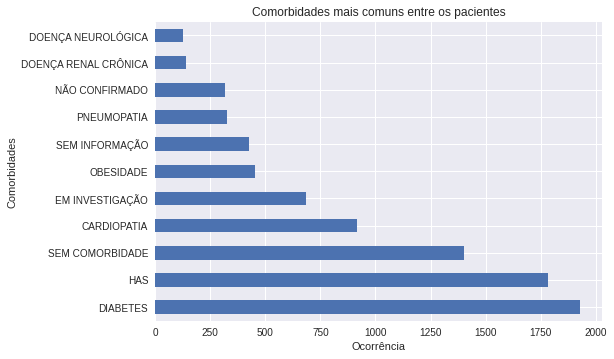

In [ ]:
df_comorbidades_top.plot.barh(title="Comorbidades mais comuns entre os pacientes")
plt.xlabel("Ocorrência")
plt.ylabel("Comorbidades")
plt.savefig("Comorbidades mais comuns entre os pacientes.png")

#### O Sexo Feminino foi o mais afetado

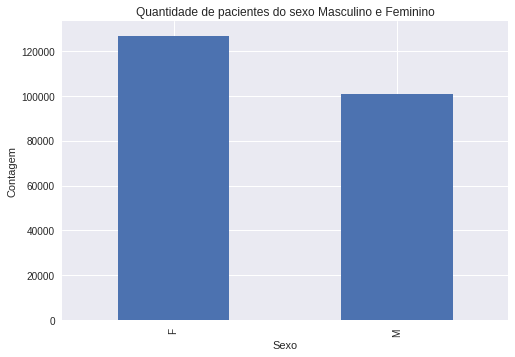

In [ ]:
df['sexo'].value_counts().plot.bar(title="Quantidade de pacientes do sexo Masculino e Feminino")
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.savefig("Quantidade de pacientes do sexo Masculino e Feminino.png")

#### Situação dos Pacientes por porcentagens

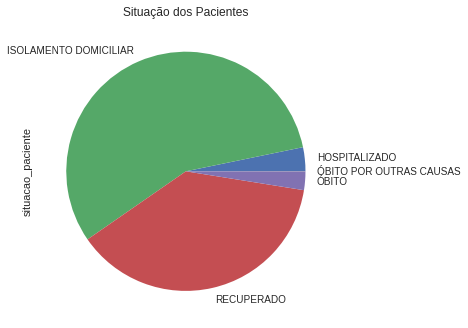

In [ ]:
df.groupby(df['situacao_paciente'])['situacao_paciente'].count().plot.pie(title="Situação dos Pacientes")
plt.savefig("Situação dos Pacientes.png")

#### Maceió e Arapiraca são os municípios com mais casos

In [ ]:
filter = df.groupby(df.municipio_residencia)['municipio_residencia'].count() > 2000
df_municipios_cont = df.groupby(df.municipio_residencia)['municipio_residencia'].count()
df_municipios_cont = df_municipios_cont.loc[filter]

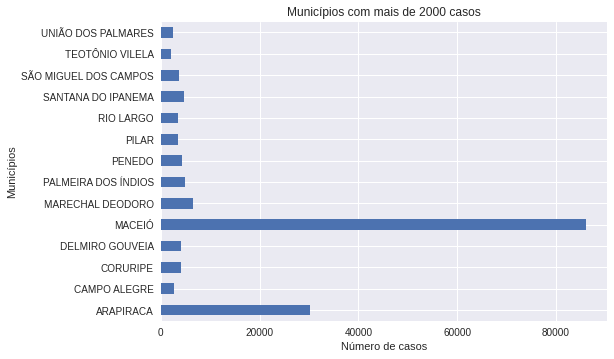

In [586]:
df_municipios_cont.plot.barh(title="Municípios com mais de 2000 casos")
plt.xlabel("Número de casos")
plt.ylabel("Municípios")
plt.savefig("Municípios com mais de 2000 casos.png")

#### O Centro de Maceió e a Zona Rural lideram o número de casos por bairro no Estado

In [ ]:
filter = df.groupby(df.bairro)['bairro'].count() > 2000
df_bairros_cont = df.groupby(df.bairro)['bairro'].count()
df_bairros_cont = df_bairros_cont.loc[filter]

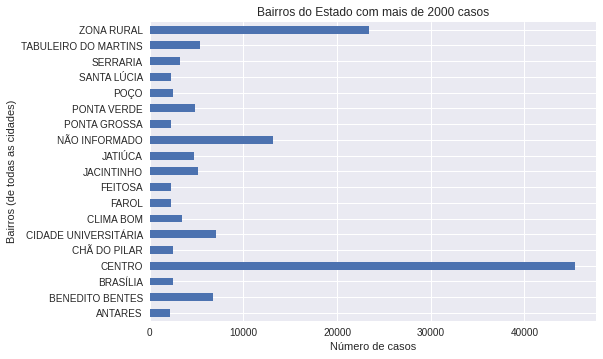

In [ ]:
df_bairros_cont.plot.barh(title="Bairros do Estado com mais de 2000 casos")
plt.xlabel("Número de casos")
plt.ylabel("Bairros (de todas as cidades)")
plt.savefig("Bairros do Estado com mais de 2000 casos.png")